In [1]:
# Imports
''' %pip install pandas
%pip install pyarrow
%pip install fastparquet
%pip install prettytable '''
import prettytable
import pandas as pd
from collections import defaultdict
import seaborn as sns
from prettytable import PrettyTable
from matplotlib import pyplot as plt
import numpy as np

In [2]:
path = 'BasedeDadosPNS-2019/'
file = 'PNS2019.parquet'
read_parquet = pd.read_parquet(path+file)

In [3]:
colunas_selecionadas = ['V0001', 'C001', 'C006', 'C008', 'C009', 'V00201','V00202','V00203','V00204','V00205','V01401','V01402','V01403','V01404','V01405', 'V02701', 'V02702']

In [4]:
v = read_parquet[~read_parquet['V001'].isnull()]

In [5]:
violencia = v[colunas_selecionadas]
#violencia.to_parquet('BasedeDadosPNS-2019/PNS2019-violencia.parquet')

In [6]:
# Altera o nome das colunas
novo_nome_colunas = ['UF', 'Qtd_Moradores', 'Sexo', 'Idade','Cor_Raca', 'V_Ofensa','V_Grito','V_Rede_Social','V_Ameaca','V_Destruiu','F_Tapa','F_Empurrou','F_Soco','F_Enforca','F_Ameaca', 'S_T_Toque', 'S_T_Ameaca']
def substitur_nome_colunas(df, novo_nome_colunas):
    df.columns = novo_nome_colunas
    return df

violencia = substitur_nome_colunas(violencia, novo_nome_colunas)

In [7]:
# Altera as colunas dicotomicas, mantendo o valor 1 porem alterando o valor dois para 0
colunas_dicotomicas = ['V_Ofensa','V_Grito','V_Rede_Social','V_Ameaca','V_Destruiu','F_Tapa','F_Empurrou','F_Soco','F_Enforca','F_Ameaca', 'S_T_Toque', 'S_T_Ameaca']

def alteraDicotomico (df, colunas_dicotomicas):
    for coluna in colunas_dicotomicas:
        df.loc[df[coluna] == 2.0, coluna] = 0
    return df

violencia = alteraDicotomico(violencia, colunas_dicotomicas)

In [8]:
# Se existem dados ausentes na coluna, imprime uma tabela da seguinte forma: Primeira coluna Total de dados na coluna - Segunda coluna Total de dados ausentes na coluna - Terceira coluna Porcentagem de dados ausentes na coluna - Quarta coluna Total de dados não ausentes na coluna - Quinta coluna Porcentagem de dados não ausentes na coluna. Cada linha representa uma coluna com dados ausentes.
t = PrettyTable(['Coluna', 'Total', 'Ausentes', 'Ausentes (%)', 'Não Ausentes', 'Não Ausentes (%)'])
for col in violencia.columns:
    if any(violencia[col].isna()):
        t.add_row([col, len(violencia[col]), violencia[col].isna().sum(), round(violencia[col].isna().sum() / len(violencia[col]) * 100, 2), len(violencia[col]) - violencia[col].isna().sum(), round((len(violencia[col]) - violencia[col].isna().sum()) / len(violencia[col]) * 100, 2)])
print(t)

+--------+-------+----------+--------------+--------------+------------------+
| Coluna | Total | Ausentes | Ausentes (%) | Não Ausentes | Não Ausentes (%) |
+--------+-------+----------+--------------+--------------+------------------+
+--------+-------+----------+--------------+--------------+------------------+


In [9]:
# funcao que altera todas as colunas do tipo float para int usando a funcao .loc

def float_to_int(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df.loc[:,col] = df[col].astype('int64')
    return df

violencia = float_to_int(violencia)

C:\Users\E00774\AppData\Local\Temp\ipykernel_11592\1493254759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col] = df[col].astype('int64')


In [10]:
violencia.to_excel('BasedeDadosPNS-2019/PNS2019-violencia.xlsx')

In [11]:
# Remove as linhas em que todas as colunas dicotomicas são 0, se uma coluna dicotomica for 1, a linha não é removida
def remove_linhas(df, colunas_dicotomicas):
    df = df.loc[(df[colunas_dicotomicas] == 0).all(axis=1) == False]
    return df

violencia = remove_linhas(violencia, colunas_dicotomicas)

In [12]:
# Normalizar a coluna idade para que a menor idade fique com o valor 0 e a maior idade com o valor 1
def normalizar_idade(df):
    df['Idade'] = (df['Idade'] - df['Idade'].min()) / (df['Idade'].max() - df['Idade'].min())
    return df




In [13]:
# print which of the dicotomy columns have the most 1s
def print_most_1s(df, colunas_dicotomicas):
    for col in colunas_dicotomicas:
        print(col, df[col].sum())
        
print_most_1s(violencia, colunas_dicotomicas)

V_Ofensa 8943
V_Grito 11027
V_Rede_Social 1958
V_Ameaca 4840
V_Destruiu 1964
F_Tapa 1432
F_Empurrou 2139
F_Soco 1009
F_Enforca 328
F_Ameaca 1292
S_T_Toque 546
S_T_Ameaca 329


<AxesSubplot:xlabel='Cor_Raca', ylabel='count'>

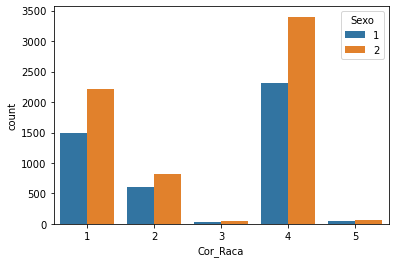

In [14]:
# plot quantity of v_grito = 1 by raca with hue sexo
sns.countplot(x='Cor_Raca', hue='Sexo', data=violencia[violencia['V_Grito'] == 1])


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Qtd_Moradores', ylabel='Density'>

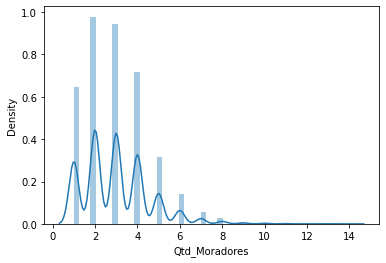

In [15]:
# plot qtd_moradores distribution
sns.distplot(violencia['Qtd_Moradores'])


In [16]:
# backup dataframe
violencia_backup = violencia.copy()

In [17]:
# Normalizing dataframe by feature clipping the lines with more than 5 moradores
def normalize_df(df):
    df = df[df['Cor_Raca'] <= 4]
    return df

violencia_backup = normalize_df(violencia_backup)

In [18]:
# Normalizing dataframe by feature clipping, removing the lines of the column idade which the total of occurrences of a value is less than 100
def normalize_df_idade(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df = df[df[col].map(df[col].value_counts()) > 100]
    return df

violencia_backup = normalize_df_idade(violencia_backup)


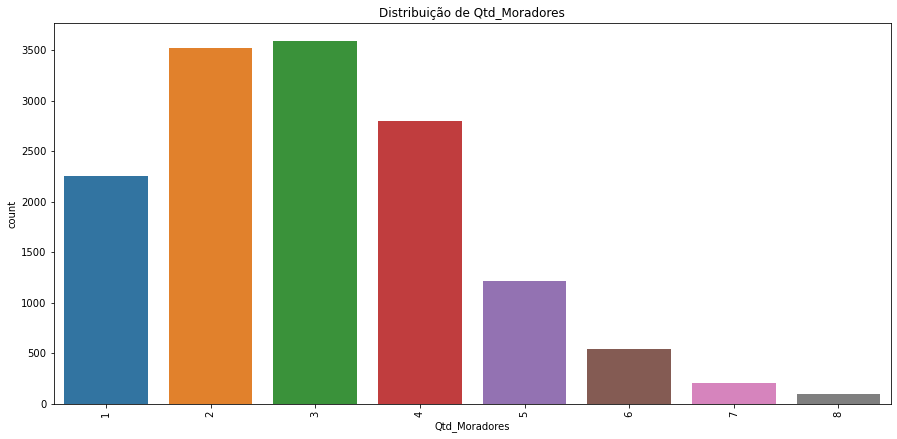

Frequente:  3


In [19]:
def dist_Attributo(df, coluna):
    plt.figure(figsize=(15,7))
    plt.title(f'Distribuição de {coluna}')
    plt.xticks(rotation=90)
    sns.countplot(data=df, x=coluna)
    plt.show()
    print('Frequente: ', df[coluna].mode()[0])
    
dist_Attributo(violencia_backup, 'Qtd_Moradores')

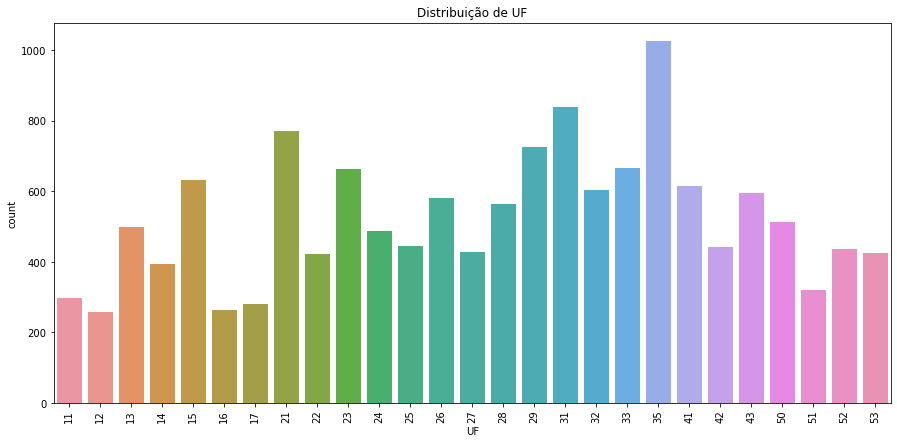

Frequente:  35


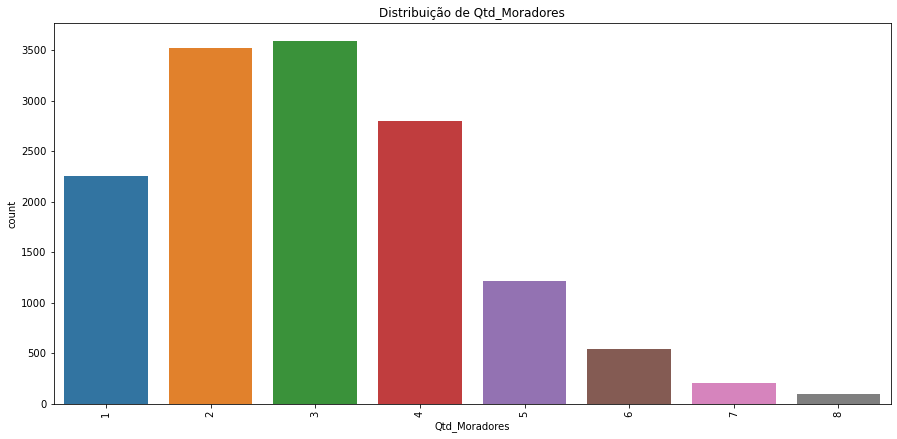

Frequente:  3


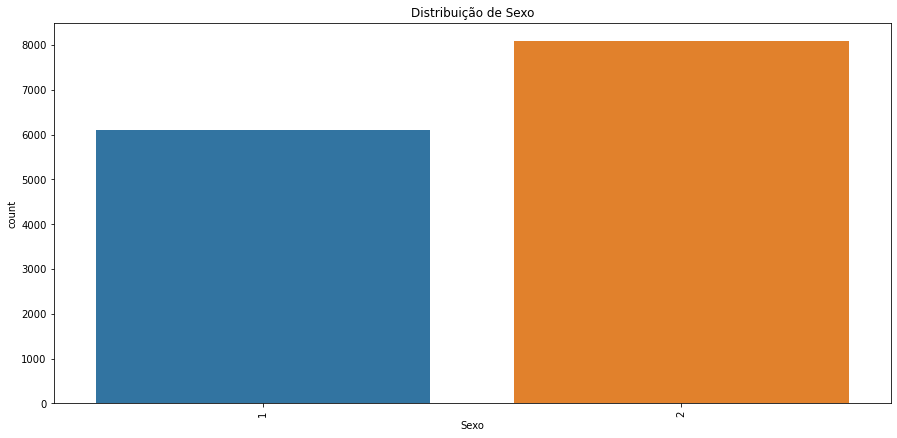

Frequente:  2


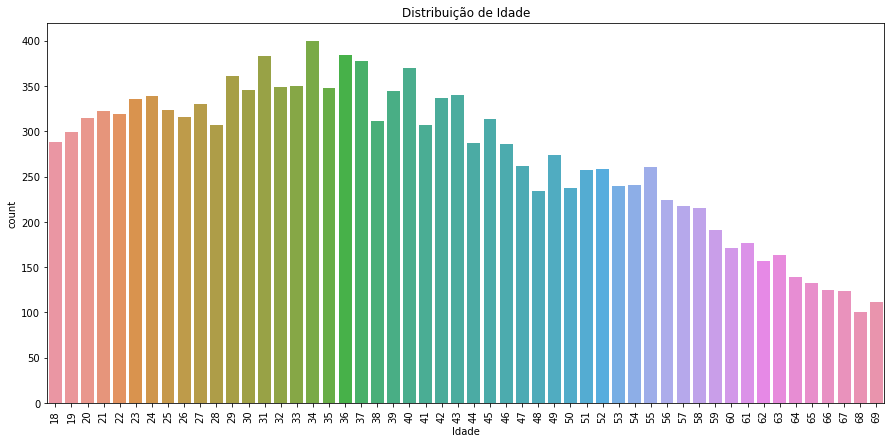

Frequente:  34


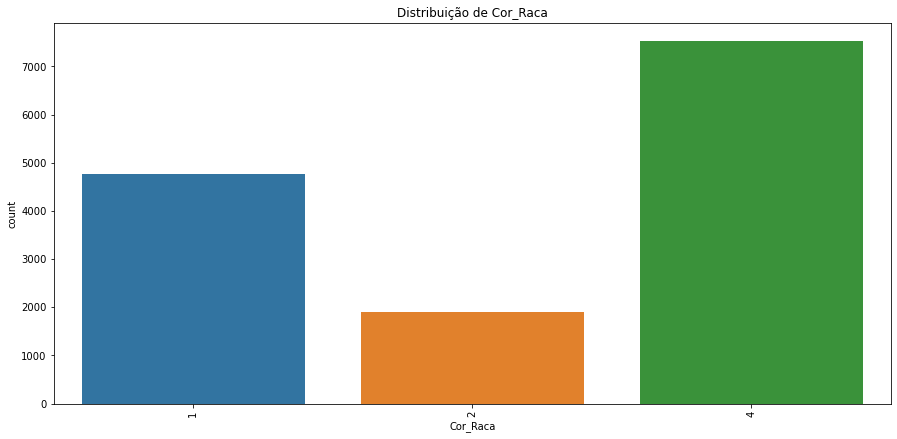

Frequente:  4


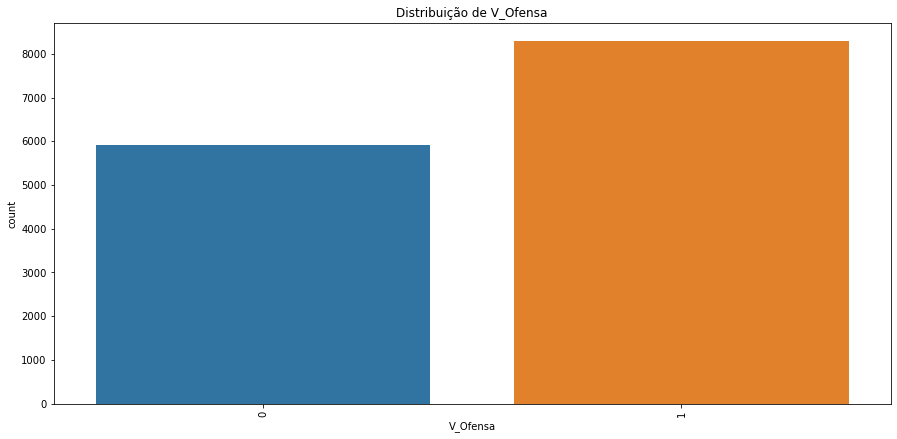

Frequente:  1


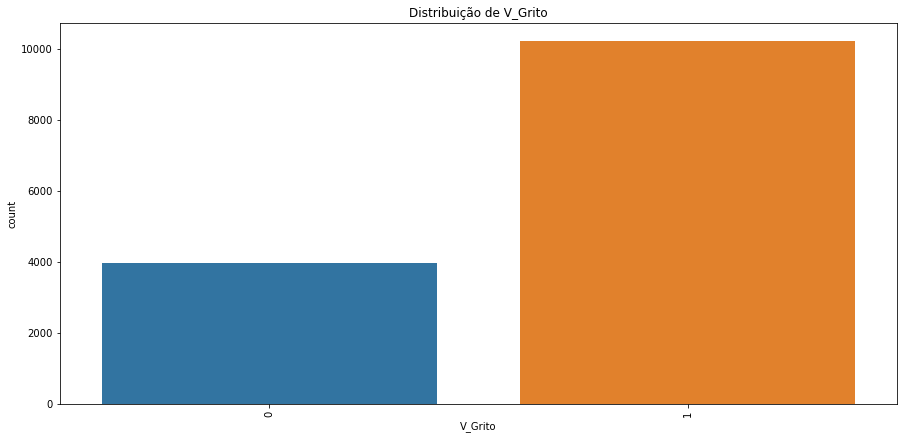

Frequente:  1


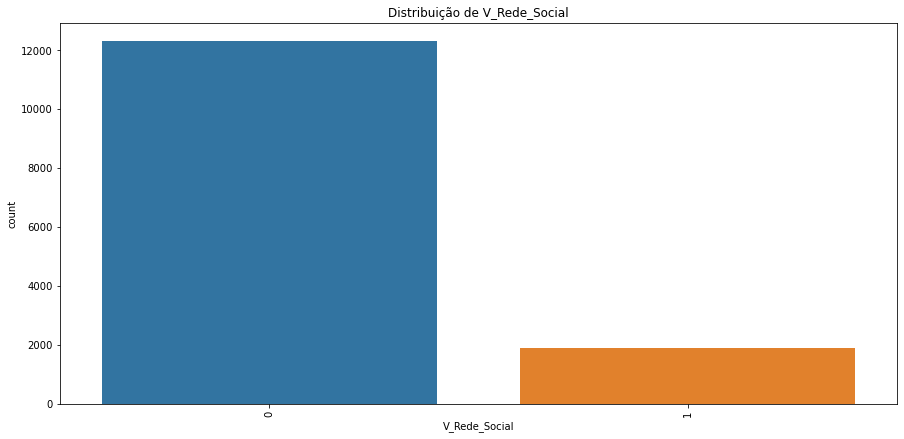

Frequente:  0


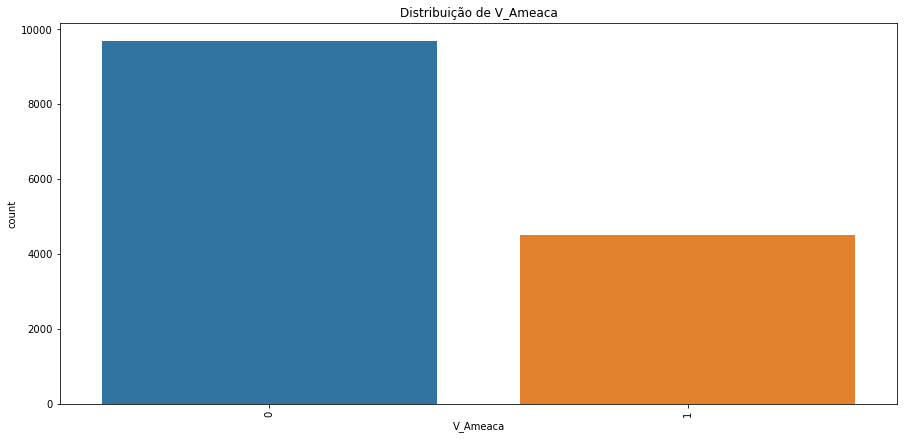

Frequente:  0


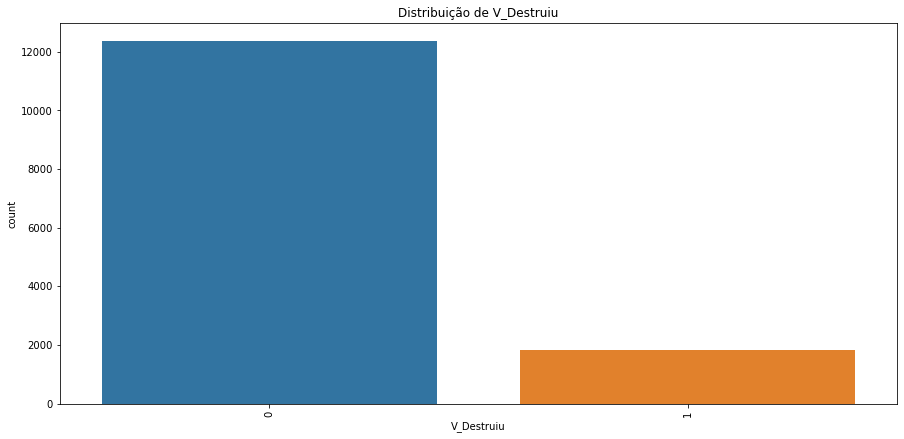

Frequente:  0


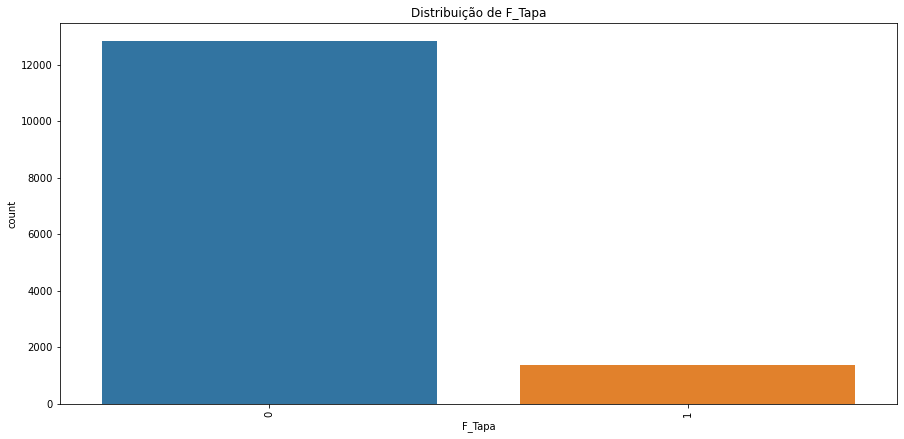

Frequente:  0


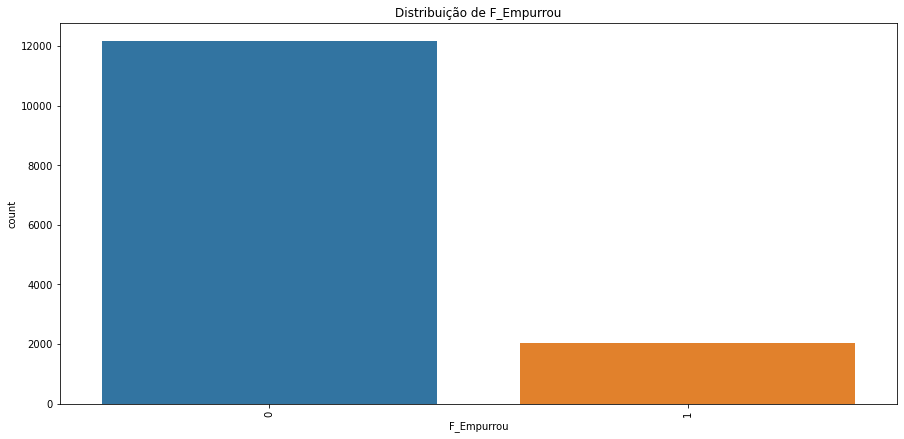

Frequente:  0


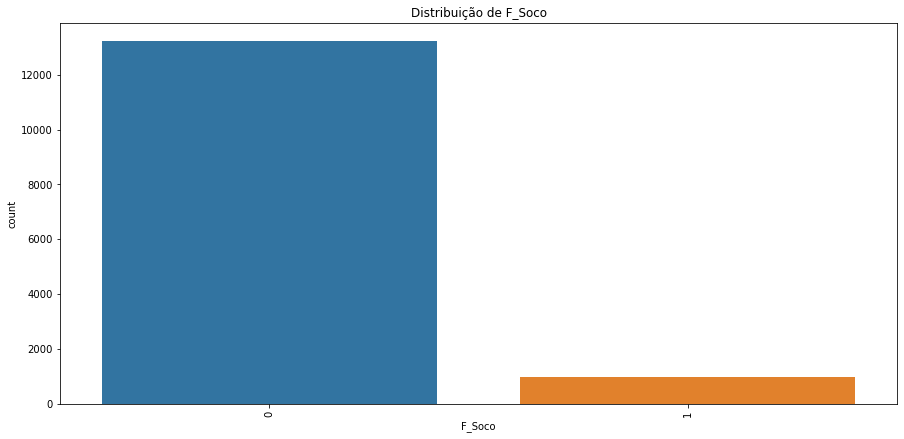

Frequente:  0


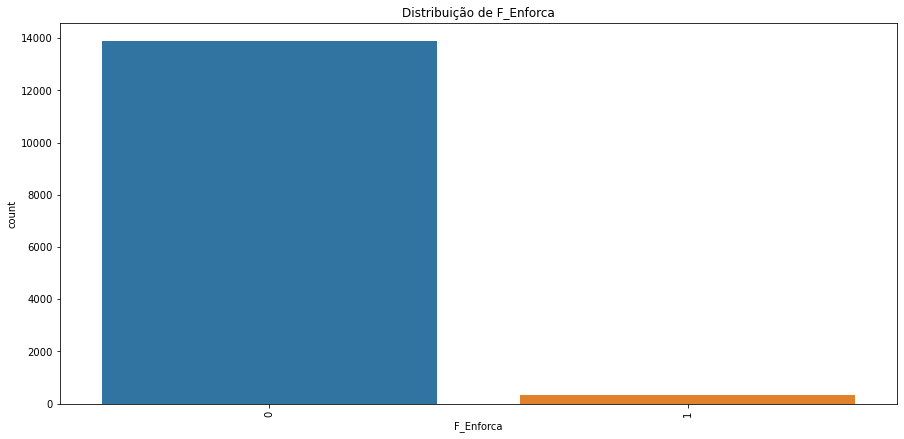

Frequente:  0


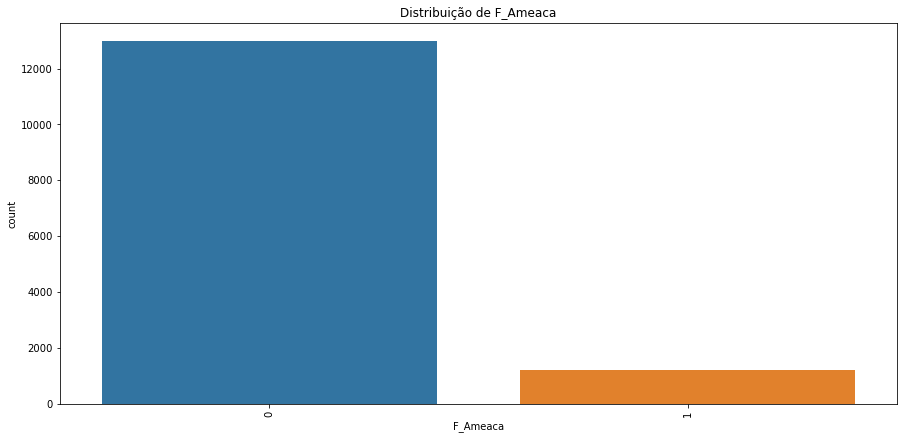

Frequente:  0


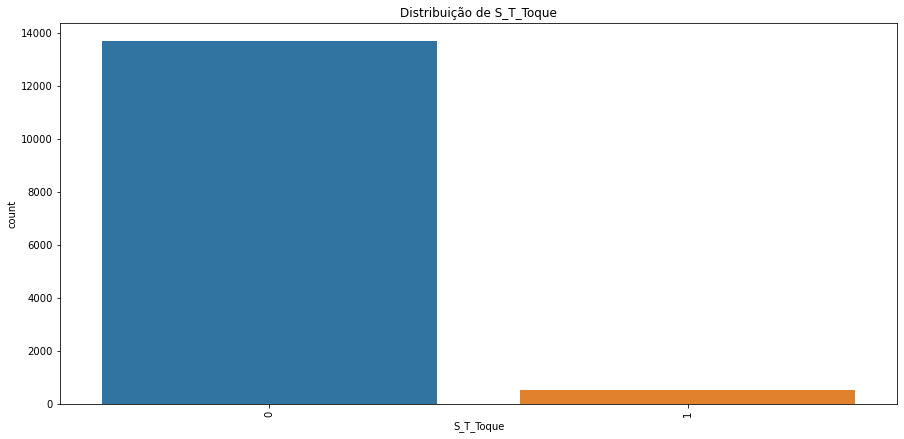

Frequente:  0


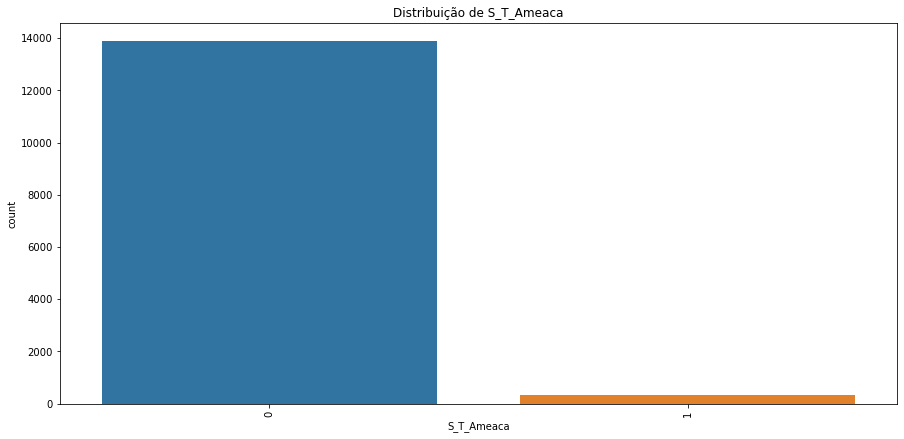

Frequente:  0


In [20]:
# plot a distribuition graph of each column

def plot_distribuition(df):
    for col in df.columns:
        plt.figure(figsize=(15,7))
        plt.title(f'Distribuição de {col}')
        plt.xticks(rotation=90)
        sns.countplot(data=df, x=col)
        plt.show()
        print('Frequente: ', df[col].mode()[0])
        
plot_distribuition(violencia_backup)

In [21]:
print_most_1s(violencia_backup, colunas_dicotomicas)

V_Ofensa 8290
V_Grito 10224
V_Rede_Social 1884
V_Ameaca 4513
V_Destruiu 1838
F_Tapa 1363
F_Empurrou 2027
F_Soco 962
F_Enforca 311
F_Ameaca 1213
S_T_Toque 515
S_T_Ameaca 313


In [22]:
# export to csv

violencia_backup.to_csv('BasedeDadosPNS-2019/PNS2019-violencia.csv')

In [23]:
# Show each column type
violencia_backup.dtypes

UF               int64
Qtd_Moradores    int64
Sexo             int64
Idade            int64
Cor_Raca         int64
V_Ofensa         int64
V_Grito          int64
V_Rede_Social    int64
V_Ameaca         int64
V_Destruiu       int64
F_Tapa           int64
F_Empurrou       int64
F_Soco           int64
F_Enforca        int64
F_Ameaca         int64
S_T_Toque        int64
S_T_Ameaca       int64
dtype: object

In [24]:
# show the interval of values of each column
violencia_backup.describe()

,UF,Qtd_Moradores,Sexo,Idade,Cor_Raca,V_Ofensa,V_Grito,V_Rede_Social,V_Ameaca,V_Destruiu,F_Tapa,F_Empurrou,F_Soco,F_Enforca,F_Ameaca,S_T_Toque,S_T_Ameaca
count,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000
mean,29.844919,3.008381,1.569758,39.766322,2.724769,0.583844,0.720051,0.132685,0.317839,0.129446,0.095993,0.142757,0.067751,0.021903,0.085429,0.036270,0.022044
std,11.569271,1.470756,0.495127,13.561826,1.389504,0.492937,0.448990,0.339246,0.465653,0.335704,0.294592,0.349837,0.251327,0.146372,0.279528,0.186968,0.146831
min,11.000000,1.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,2.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,3.000000,2.000000,38.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,4.000000,2.000000,50.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,53.000000,8.000000,2.000000,69.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# show the frequency of each value of each column
violencia_backup.describe(include='all')

,UF,Qtd_Moradores,Sexo,Idade,Cor_Raca,V_Ofensa,V_Grito,V_Rede_Social,V_Ameaca,V_Destruiu,F_Tapa,F_Empurrou,F_Soco,F_Enforca,F_Ameaca,S_T_Toque,S_T_Ameaca
count,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000,14199.000000
mean,29.844919,3.008381,1.569758,39.766322,2.724769,0.583844,0.720051,0.132685,0.317839,0.129446,0.095993,0.142757,0.067751,0.021903,0.085429,0.036270,0.022044
std,11.569271,1.470756,0.495127,13.561826,1.389504,0.492937,0.448990,0.339246,0.465653,0.335704,0.294592,0.349837,0.251327,0.146372,0.279528,0.186968,0.146831
min,11.000000,1.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,2.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,3.000000,2.000000,38.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,4.000000,2.000000,50.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,53.000000,8.000000,2.000000,69.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# Cria a tabela de Descrição Estatística dos atributos
 # Coluna Atributo
 # Coluna Tipo
 # Coluna Valor Mínimo se for numérico senao 'Não se aplica'
 # Coluna Valor Máximo se for numérico senao 'Não se aplica'
 # Coluna Média se for numérico senao 'Não se aplica'
 # Coluna Desvio Padrão se for numérico senao 'Não se aplica'
 # Coluna Moda se for numérico senao 'Não se aplica'
 # Coluna Distribuição se for numérico senao 'Não se aplica'
 # Coluna Dados Ausentes se possuir dados ausentes exibe o total senao exibe '-'
 
tipos = {'UF': 'Qualitativo Politomica', 'Idade': 'Quantitativo Discreto', 'Cor_Raca': 'Qualitativo Politomica', 'Qtd_Moradores': 'Quantitativo Discreto', 'Sexo': 'Qualitativo Dicotomico', 'V_Ofensa': 'Qualitativo Dicotomica', 'V_Grito': 'Qualitativo Dicotomica', 'V_Rede_Social': 'Qualitativo Dicotomica', 'V_Ameaca': 'Qualitativo Dicotomica', 'V_Destruiu': 'Qualitativo Dicotomica', 'F_Tapa': 'Qualitativo Dicotomica','F_Empurrou': 'Qualitativo Dicotomica','F_Soco': 'Qualitativo Dicotomica','F_Enforca': 'Qualitativo Dicotomica','F_Ameaca': 'Qualitativo Dicotomica','S_T_Toque': 'Qualitativo Dicotomica','S_T_Ameaca': 'Qualitativo Dicotomica'}
 
t = PrettyTable(['Atributo', 'Tipo', 'Valor Mínimo', 'Valor Máximo', 'Média', 'Desvio Padrão', 'Moda', 'Distribuição', 'Dados Ausentes'])
for col in violencia_backup.columns:
    if violencia_backup[col].dtype == 'int64':
        tipo = tipos[col]
        minimo = violencia_backup[col].min()
        maximo = violencia_backup[col].max()
        media = violencia_backup[col].mean()
        desvio = violencia_backup[col].std()
        moda = violencia_backup[col].mode()[0]
        distribuicao = 'Normal'
        if violencia_backup[col].isnull().sum() > 0:
            ausentes = violencia_backup[col].isnull().sum()
        else:
            ausentes = '-'
    else:
        tipo = tipos[col]
        minimo = 'Não se aplica'
        maximo = 'Não se aplica'
        media = 'Não se aplica'
        desvio = 'Não se aplica'
        moda = violencia_backup[col].mode()[0]
        distribuicao = 'Não se aplica'
        if violencia_backup[col].isnull().sum() > 0:
            ausentes = violencia_backup[col].isnull().sum()
        else:
            ausentes = '-'
    t.add_row([col, tipo, minimo, maximo, media, desvio, moda, distribuicao, ausentes])
    
print(t)

+---------------+------------------------+--------------+--------------+----------------------+---------------------+------+--------------+----------------+
|    Atributo   |          Tipo          | Valor Mínimo | Valor Máximo |        Média         |    Desvio Padrão    | Moda | Distribuição | Dados Ausentes |
+---------------+------------------------+--------------+--------------+----------------------+---------------------+------+--------------+----------------+
|       UF      | Qualitativo Politomica |      11      |      53      |  29.844918656243397  |  11.56927148718183  |  35  |    Normal    |       -        |
| Qtd_Moradores | Quantitativo Discreto  |      1       |      8       |  3.008380871892387   |  1.4707555048043328 |  3   |    Normal    |       -        |
|      Sexo     | Qualitativo Dicotomico |      1       |      2       |  1.5697584336925137  | 0.49512728292974306 |  2   |    Normal    |       -        |
|     Idade     | Quantitativo Discreto  |      18      | 

array([[<AxesSubplot:title={'center':'UF'}>,
        <AxesSubplot:title={'center':'Qtd_Moradores'}>,
        <AxesSubplot:title={'center':'Sexo'}>,
        <AxesSubplot:title={'center':'Idade'}>],
       [<AxesSubplot:title={'center':'Cor_Raca'}>,
        <AxesSubplot:title={'center':'V_Ofensa'}>,
        <AxesSubplot:title={'center':'V_Grito'}>,
        <AxesSubplot:title={'center':'V_Rede_Social'}>],
       [<AxesSubplot:title={'center':'V_Ameaca'}>,
        <AxesSubplot:title={'center':'V_Destruiu'}>,
        <AxesSubplot:title={'center':'F_Tapa'}>,
        <AxesSubplot:title={'center':'F_Empurrou'}>],
       [<AxesSubplot:title={'center':'F_Soco'}>,
        <AxesSubplot:title={'center':'F_Enforca'}>,
        <AxesSubplot:title={'center':'F_Ameaca'}>,
        <AxesSubplot:title={'center':'S_T_Toque'}>],
       [<AxesSubplot:title={'center':'S_T_Ameaca'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

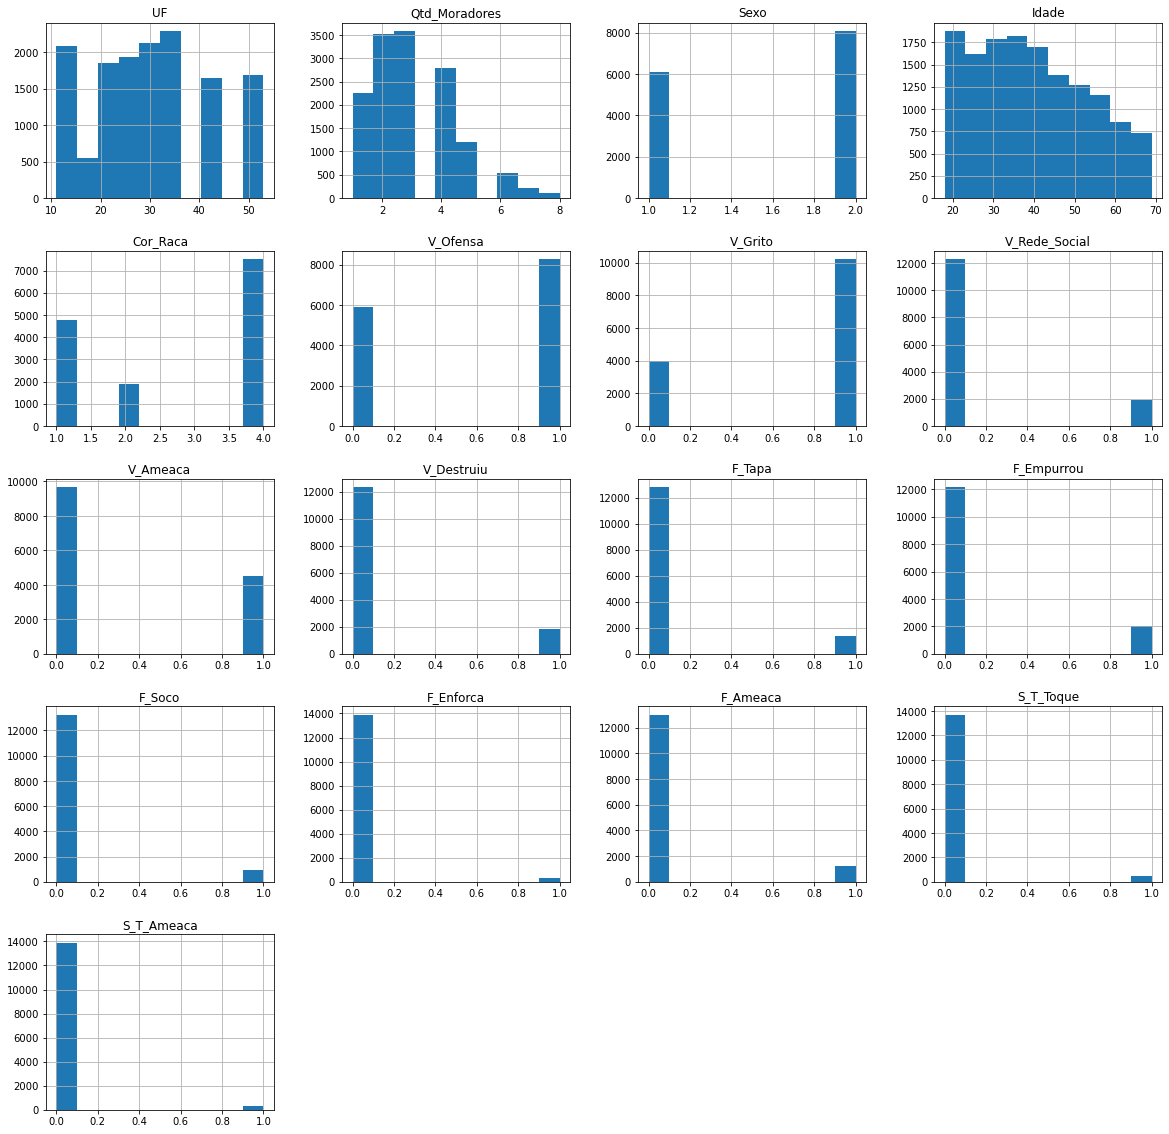

In [31]:
# show histogram of each column
violencia_backup.hist(figsize=(20,20))